<p><font size="6"><b>04 - Pandas: Working with time series data</b></font></p>

> *© 2025, Joris Van den Bossche and Stijn Van Hoey  (<mailto:jorisvandenbossche@gmail.com>, <mailto:stijnvanhoey@gmail.com>). Licensed under [CC BY 4.0 Creative Commons](http://creativecommons.org/licenses/by/4.0/)*

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Dates and times in pandas

Pandas has its own date and time objects, which are compatible with the [standard `datetime` objects](https://docs.python.org/3/library/datetime.html), but provide some more functionality to work with.  

Consider the following datetime information, represented as strings:

In [2]:
s = pd.Series(['2016-12-09 10:00:00', '2016-12-09 11:00:00', '2016-12-09 12:00:00'])

In [3]:
s

0    2016-12-09 10:00:00
1    2016-12-09 11:00:00
2    2016-12-09 12:00:00
dtype: object

The `to_datetime` function can be used to convert string formatted dates into Pandas __Timestamp__ objects:

In [4]:
ts = pd.to_datetime(s)
ts

0   2016-12-09 10:00:00
1   2016-12-09 11:00:00
2   2016-12-09 12:00:00
dtype: datetime64[ns]

Notice the data type of this series has changed: the `datetime64[ns]` dtype. This indicates that we have a series of actual timestamp values.

Like with standard Python [`datetime.datetime` objects](https://docs.python.org/3/library/datetime.html#datetime.datetime), there are several useful attributes available on the pandas `Timestamp`. And those are also available on a Series with datetime data using the **`.dt`** accessor. For example, we can get the month, hour, day of the week,... (experiment with tab completion!) for each of the timestamps:

In [5]:
ts.dt.month

0    12
1    12
2    12
dtype: int32

In [6]:
ts.dt.hour

0    10
1    11
2    12
dtype: int32

In [7]:
ts.dt.dayofweek

0    4
1    4
2    4
dtype: int32

Each of the individual elements in the Series is a pandas `Timestamp` object:

In [8]:
ts[0]

Timestamp('2016-12-09 10:00:00')

The `Timestamp` object can also be constructed from a string and provides access to the Timestamp attributes:

In [9]:
ts_singe = pd.Timestamp('2016-12-21 23:02')

In [10]:
ts_singe.month, ts_singe.hour, ts_singe.dayofweek

(12, 23, 2)

There is also a `Timedelta` type, which can e.g. be used to add intervals of time:

In [11]:
ts + pd.Timedelta('5 days')

0   2016-12-14 10:00:00
1   2016-12-14 11:00:00
2   2016-12-14 12:00:00
dtype: datetime64[ns]

To quickly construct some regular time series data, the [``pd.date_range``](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.date_range.html) function comes in handy:

In [12]:
pd.Series(pd.date_range(start="2016-01-01", periods=10, freq='3h'))

0   2016-01-01 00:00:00
1   2016-01-01 03:00:00
2   2016-01-01 06:00:00
3   2016-01-01 09:00:00
4   2016-01-01 12:00:00
5   2016-01-01 15:00:00
6   2016-01-01 18:00:00
7   2016-01-01 21:00:00
8   2016-01-02 00:00:00
9   2016-01-02 03:00:00
dtype: datetime64[ns]

## Parsing datetime strings

![](http://imgs.xkcd.com/comics/iso_8601.png)

Unfortunately, when working with real world data, you encounter many different `datetime` formats. Most of the time when you have to deal with them, they come in text format, e.g. from a `CSV` file. To work with those data in Pandas, we first have to *parse* the strings to actual `Timestamp` objects.

<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

To convert different kind of string formatted dates to Timestamp objects: use the `pandas.to_datetime` function 

</div>

In [13]:
pd.to_datetime("2016-12-09")

Timestamp('2016-12-09 00:00:00')

In [14]:
pd.to_datetime("09/12/2016")

Timestamp('2016-09-12 00:00:00')

In [15]:
pd.to_datetime("09/12/2016", format="%d/%m/%Y")

Timestamp('2016-12-09 00:00:00')

A detailed overview of how to specify the `format` string, see the table in the python documentation: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

# Time series data: `Timestamp` in the index

## River discharge example data

For the following demonstration of the time series functionality, we use a sample of discharge data of the Maarkebeek (Flanders) with 3 hour averaged values, derived from the [Waterinfo website](https://www.waterinfo.be/).

In [16]:
data = pd.read_csv("data/vmm_flowdata.csv")

In [17]:
data.head()

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000


We already know how to parse a date column with Pandas:

In [18]:
data['Time'] = pd.to_datetime(data['Time'])

With `set_index('datetime')`, we set the column with datetime values as the index, which can be done by both `Series` and `DataFrame`.

In [19]:
data = data.set_index("Time")

In [20]:
data

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


The steps above are provided as built-in functionality of `read_csv`:

In [21]:
data = pd.read_csv("data/vmm_flowdata.csv", index_col=0, parse_dates=True)

<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

`pd.read_csv` provides a lot of built-in functionality to support this kind of transactions when reading in a file! Check the help of the read_csv function...

</div>

## The DatetimeIndex

When we ensure the DataFrame has a `DatetimeIndex`, time-series related functionality becomes available:

In [22]:
data.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 03:00:00',
               '2009-01-01 06:00:00', '2009-01-01 09:00:00',
               '2009-01-01 12:00:00', '2009-01-01 15:00:00',
               '2009-01-01 18:00:00', '2009-01-01 21:00:00',
               '2009-01-02 00:00:00', '2009-01-02 03:00:00',
               ...
               '2012-12-31 21:00:00', '2013-01-01 00:00:00',
               '2013-01-01 03:00:00', '2013-01-01 06:00:00',
               '2013-01-01 09:00:00', '2013-01-01 12:00:00',
               '2013-01-01 15:00:00', '2013-01-01 18:00:00',
               '2013-01-01 21:00:00', '2013-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=11697, freq=None)

Similar to a Series with datetime data, there are some attributes of the timestamp values available:

In [23]:
data.index.day

Index([ 1,  1,  1,  1,  1,  1,  1,  1,  2,  2,
       ...
       31,  1,  1,  1,  1,  1,  1,  1,  1,  2],
      dtype='int32', name='Time', length=11697)

In [24]:
data.index.dayofyear

Index([  1,   1,   1,   1,   1,   1,   1,   1,   2,   2,
       ...
       366,   1,   1,   1,   1,   1,   1,   1,   1,   2],
      dtype='int32', name='Time', length=11697)

In [25]:
data.index.year

Index([2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009, 2009,
       ...
       2012, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013, 2013],
      dtype='int32', name='Time', length=11697)

The `plot` method will also adapt its labels (when you zoom in, you can see the different levels of detail of the datetime labels):

In [26]:
%matplotlib widget

<Axes: xlabel='Time'>

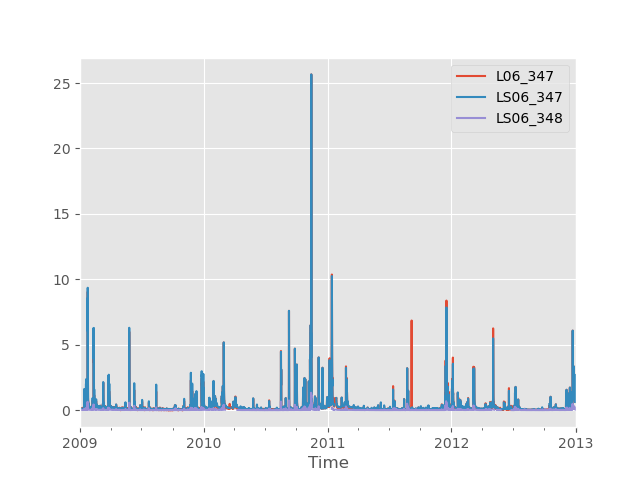

In [27]:
data.plot()

In [28]:
# switching back to static inline plots (the default)
%matplotlib inline

We have too much data to sensibly plot on one figure. Let's see how we can easily select part of the data or aggregate the data to other time resolutions in the next sections.

## Selecting data from a time series

We can use label based indexing on a timeseries as expected:

In [29]:
data[pd.Timestamp("2012-01-01 09:00"):pd.Timestamp("2012-01-01 19:00")]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


But, for convenience, indexing a time series also works with strings:

In [30]:
data["2012-01-01 09:00":"2012-01-01 19:00"]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


A nice feature is **"partial string" indexing**, where we can do implicit slicing by providing a partial datetime string.

E.g. all data of 2013:

In [31]:
data['2013':]

,L06_347,LS06_347,LS06_348
Time,,,
2013-01-01 00:00:00,1.688333,1.688333,0.207333
2013-01-01 03:00:00,2.693333,2.693333,0.201500
2013-01-01 06:00:00,2.220833,2.220833,0.166917
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


Or all data of January up to March 2012:

In [32]:
data['2012-01':'2012-03']

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
...,...,...,...
2012-03-31 09:00:00,0.104917,0.125000,0.012417
2012-03-31 12:00:00,0.098333,0.124417,0.011833
2012-03-31 15:00:00,0.091917,0.123917,0.011500


# Exercises

Let's practice this yourself using the same dataset:

In [33]:
data = pd.read_csv("data/vmm_flowdata.csv", index_col=0, parse_dates=True)

<div class="alert alert-success">

**EXERCISE:**

Select all data starting from 2012

</div>

In [34]:
data['2012':]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


<div class="alert alert-success">

**EXERCISE**:

Select all data in January for all different years

<details><summary>Hints</summary>

* Remember you can get information about the month of each timestamp using the `month` attribute of the DatetimeIndex.

</details>

</div>

In [35]:
data[data.index.month == 1]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


<div class="alert alert-success">

**EXERCISE**:

Select all data in April, May and June for all different years

<details><summary>Hints</summary>

* If you want to check for equality with multiple possible values (equal to x OR equal to y OR ...), the `isin()` method can be easier to use.

</details>

</div>

In [36]:
data[data.index.month.isin([4, 5, 6])]

,L06_347,LS06_347,LS06_348
Time,,,
2009-04-01 00:00:00,0.270417,0.233500,0.031250
2009-04-01 03:00:00,0.249917,0.247083,0.030750
2009-04-01 06:00:00,0.278167,0.260083,0.032583
2009-04-01 09:00:00,0.324833,0.301583,0.034250
2009-04-01 12:00:00,0.287917,0.254917,0.033833
...,...,...,...
2012-06-30 09:00:00,0.288000,0.060583,0.007333
2012-06-30 12:00:00,0.288000,0.061417,0.006333
2012-06-30 15:00:00,0.287583,0.063083,0.004833


<div class="alert alert-success">

**EXERCISE**

Select all 'daytime' data (between 8h and 20h) for all days
    
</div>

In [37]:
data[(data.index.hour > 8) & (data.index.hour < 20)]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
2009-01-01 15:00:00,0.099167,0.091667,0.017583
2009-01-01 18:00:00,0.132667,0.090167,0.016250
2009-01-02 09:00:00,0.141917,0.097083,0.016417
...,...,...,...
2012-12-31 18:00:00,0.617333,0.617333,0.060583
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583


# The power of pandas: `resample`

A very powerfull method is **`resample`: converting the frequency of the time series** (e.g. from hourly to daily data).

The time series has a frequency of 1 hour. I want to change this to daily:

In [38]:
data.resample('D').mean().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.125010,0.092281,0.016635
2009-01-02,0.124146,0.095781,0.016406
2009-01-03,0.113562,0.085542,0.016094
2009-01-04,0.140198,0.102708,0.017323
2009-01-05,0.128812,0.104490,0.018167


Other mathematical methods can also be specified:

In [39]:
data.resample('D').max().head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.140917,0.097500,0.017583
2009-01-02,0.147833,0.101917,0.016833
2009-01-03,0.135833,0.092500,0.016833
2009-01-04,0.160417,0.113750,0.018417
2009-01-05,0.161500,0.115167,0.021583


<div class="alert alert-info">
<b>REMEMBER</b>: <br><br>

The string to specify the new time frequency: http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases <br>

These strings can also be combined with numbers, eg `'10D'`...

</div>

<Axes: xlabel='Time'>

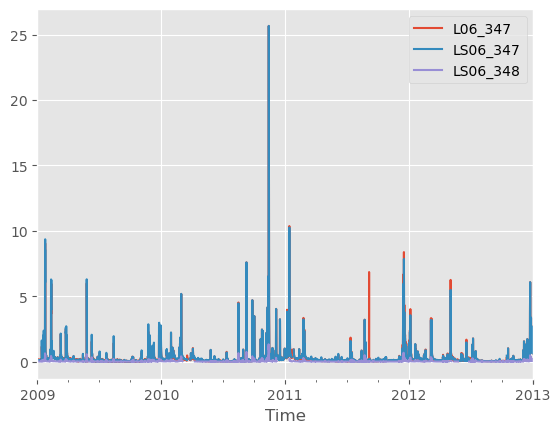

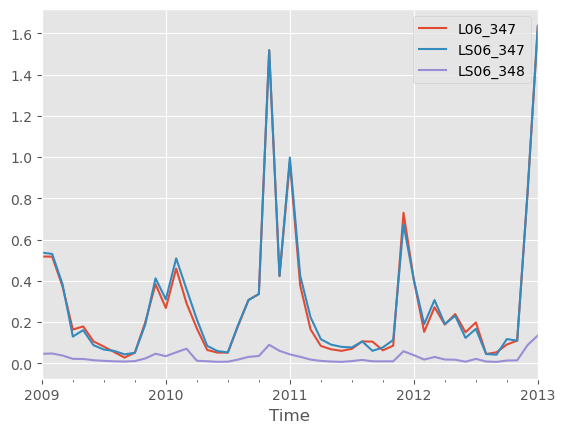

In [40]:
data.resample('ME').mean().plot() # 10D, MS

<div class="alert alert-success">

**EXERCISE**

Plot the monthly standard deviation of the columns. Use the last day of each month to represent the month.

<details><summary>Hints</summary>

* Pandas has both a [`ME` and `MS` month (offset)](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects) to represent the month by the 'calendar month end' (`ME`) or 'calendar month start' (`MS`) respectively.

</details>
    
</div>

<Axes: xlabel='Time'>

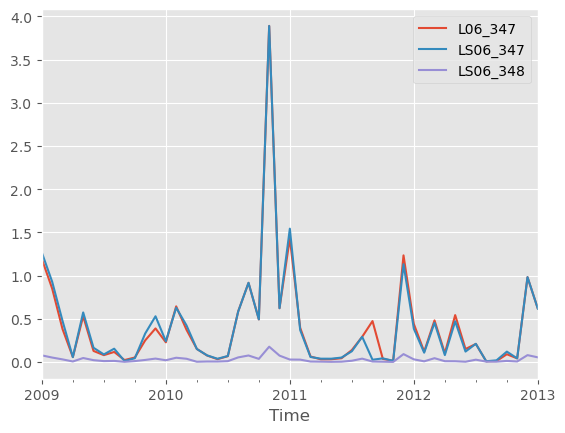

In [41]:
data.resample('ME').std().plot() # 'A'

<div class="alert alert-success">

**EXERCISE**

Plot the monthly mean and median values for the years 2011-2012 for 'L06_347'. Use the last day of each month to represent the month.

<details><summary>Hints</summary>

* Did you know <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html"><code>agg</code></a> to derive multiple statistics at the same time?

</details>

</div>

<Axes: xlabel='Time'>

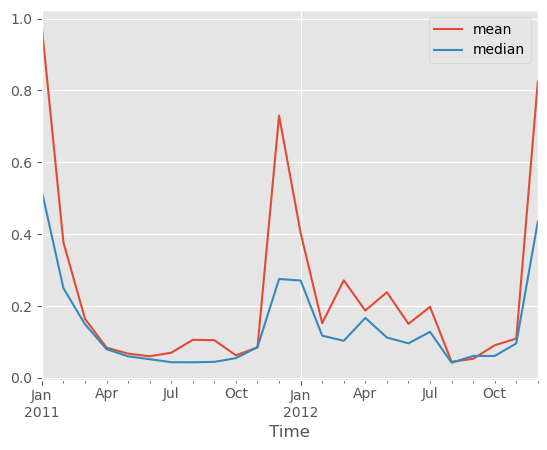

In [42]:
subset = data['2011':'2012']['L06_347']
subset.resample('ME').agg(['mean', 'median']).plot()

<div class="alert alert-success">

**EXERCISE**

Plot the monthly mininum and maximum daily average value of the 'LS06_348' column. Use the first day of each month to represent the month.

In [43]:
daily = data['LS06_348'].resample('D').mean() # daily averages calculated

<Axes: xlabel='Time'>

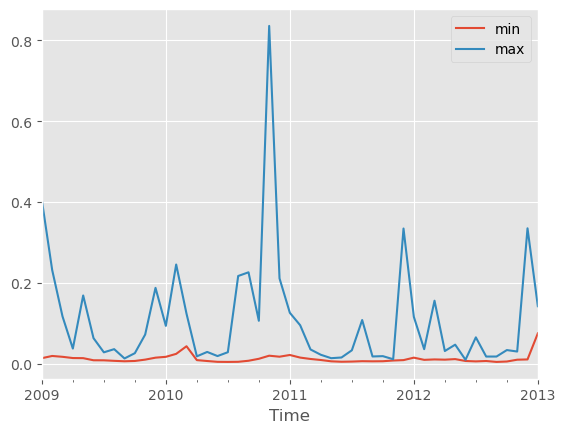

In [44]:
daily.resample('MS').agg(['min', 'max']).plot() # monthly minimum and maximum values of these daily averages

<div class="alert alert-success">
    
**EXERCISE**
    
Make a bar plot of the mean of the stations in year of 2013

<details><summary>Hints</summary>

* If you can directly slice and aggregate the data, you do not have to use resample.

</details>

</div>

<Axes: >

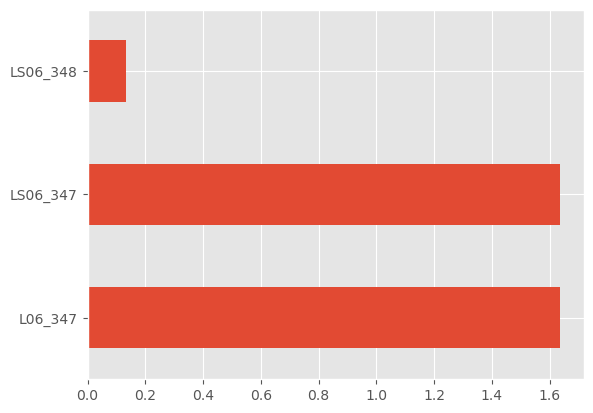

In [45]:
data['2013':'2013'].mean().plot(kind='barh')